# Forecasting India's Economic Future: A Linear Regression Approach

In this project, we explore the dynamics of India's GDP using a linear regression model to forecast its economic trajectory. Our analysis focuses on the remarkable growth trajectory of India’s economy when significant reforms and initiatives propelled its GDP. Employing a robust linear regression model, we predict the GDP for the upcoming year, highlighting the model's ability to learn from historical data and provide insights into future economic trends.

In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker
import numpy as np

# Prepare Data

## Import

**Task 1.0**: Load a CSV file containing GDP data for India and displays the first five rows of the dataset.

In the code given below, `pd.read_csv()` is used to read the CSV file located at the specified path, which contains GDP data for India from 1960 to 2023. The resulting dataset is stored in a `pandas` DataFrame called `df`. 

In [2]:
df = pd.read_csv("/Users/anoop/Downloads/gdp_india_1960-2023.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,India,IND,GDP (current US$),NY.GDP.MKTP.CD,3.702988e+10,3.923244e+10,4.216148e+10,4.842192e+10,5.648029e+10,5.955611e+10,...,2.039126e+12,2.103588e+12,2.294797e+12,2.651474e+12,2.702930e+12,2.835606e+12,2.674852e+12,3.167271e+12,3.353470e+12,3.549919e+12


## Explore

In the above DataFrame `df` the GDP values are spread across multiple columns, each representing a different year. Plus, we have some extra columns that aren't necessary for our task. What we really need is a **tidy dataset** where all the GDP values are stacked neatly in a single column and organized by year.

So, let's roll up our sleeves and reshape this dataset into something more analysis-friendly!

**Task 1.1**: Reshape the dataset by converting GDP values across multiple columns into a single column and organizes the data by year, while removing unnecessary columns.

We can use `pd.melt()` to transform the wide format of the dataset (where each year's `GDP` is in a separate column) into a long format, where all the GDP values are placed in a single column called GDP, and the corresponding years are placed in a new column called `Year`.

Alright, after melting, the code sets the `Year` column as the index for better organization and then removes the unnecessary identifier columns to keep only the `Year` and `GDP` information. This makes the data easier to work with for time series analysis.

In [3]:
# Reshaping the dataset by melting it to convert GDP values across multiple columns into a single column
df = pd.melt(
    df,
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],  # Columns to keep as identifiers
    var_name='Year',      # The name of the new column for the years
    value_name='GDP'      # The name of the new column for the GDP values
)

# Setting the 'Year' column as the index and dropping unnecessary columns
df = df.set_index("Year").drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])

# Display the first few rows of the reshaped dataframe
df.head()

,GDP
Year,
1960,3.702988e+10
1961,3.923244e+10
1962,4.216148e+10
1963,4.842192e+10
1964,5.648029e+10


**Task 1.2**: Create a line plot of India's GDP from 1960 to 2023 with improved readability, formatted axes, and a well-presented legend and grid.

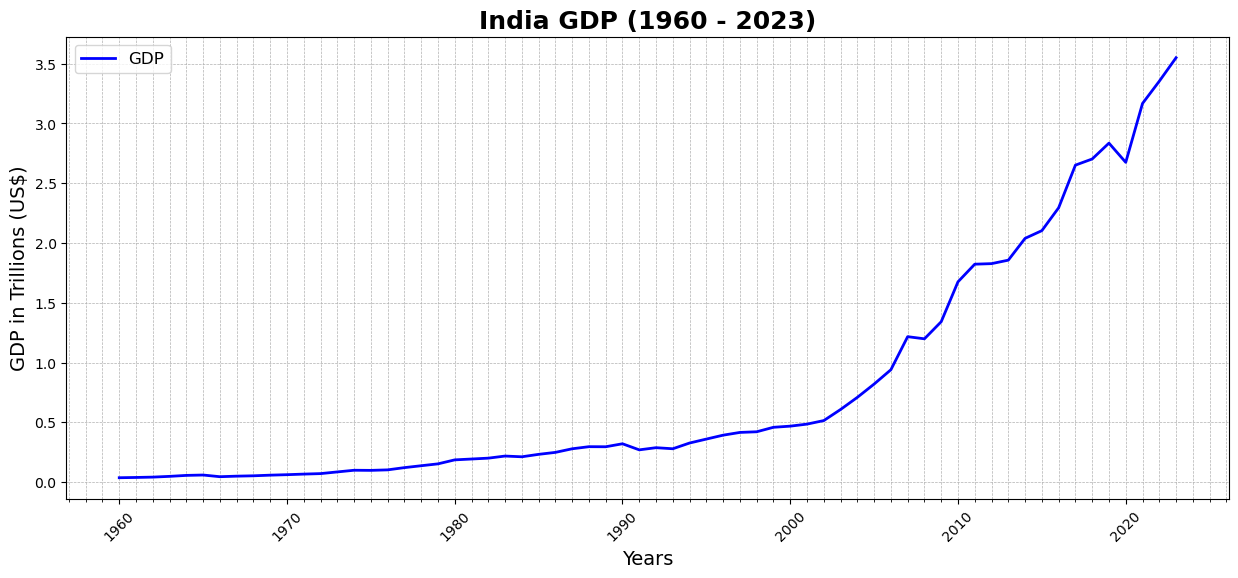

In [4]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot GDP and GDP_L1 with different colors
df['GDP'].plot(ax=ax, color="blue", linewidth=2, label="GDP")
#df['GDP_L1'].plot(ax=ax, color="green", linewidth=2, linestyle='--', label="GDP (Lagged by 1 Year)")

# Improve the title and labels
plt.title("India GDP (1960 - 2023)", fontsize=18, fontweight='bold')
plt.xlabel("Years", fontsize=14)
plt.ylabel("GDP in Trillions (US$)", fontsize=14)

# Format x-axis ticks for better readability (showing every 10 years)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# Format y-axis ticks to show values in trillions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-12:.1f}'))

# Add grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend to differentiate GDP and GDP_L1
plt.legend(loc="upper left", fontsize=12)

# Optional: rotate x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

**Task 1.3**: Create a customized box plot of India's GDP from 1960 to 2023 with enhanced visual elements, including color, axis formatting, and grid lines.

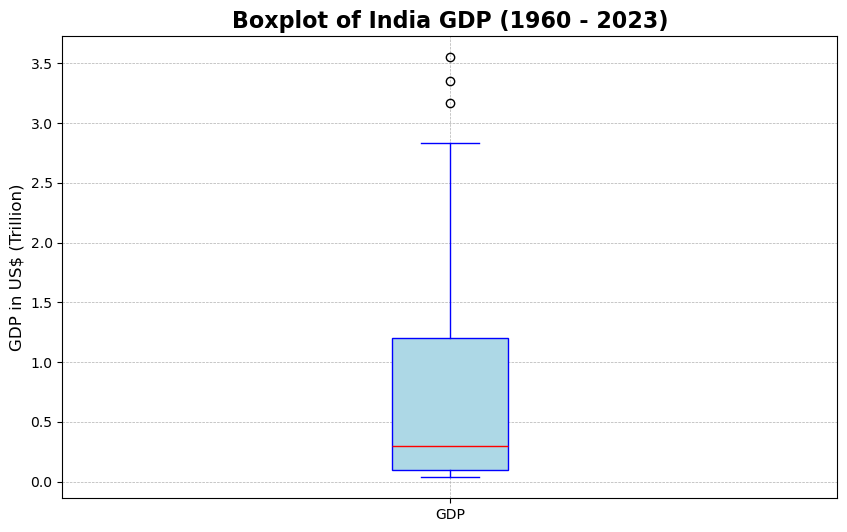

In [5]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Box plot with custom color
df.boxplot(column='GDP', ax=ax, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
           medianprops=dict(color='red'))

# Improve the title and labels
plt.title('Boxplot of India GDP (1960 - 2023)', fontsize=16, fontweight='bold')
plt.ylabel('GDP in US$ (Trillion)', fontsize=12)

# Format y-axis to show GDP in trillions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y*1e-12:.1f}'))

# Add a grid for better readability
ax.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

**Are these really "outliers" or just the sign of a booming economy?**

When looking at the box plot, you might notice a few data points sticking out, signaling potential outliers. But hold on—before we rush to remove them, let’s pause and consider the bigger picture. 

India's economy is one of the fastest-growing in the world. What the box plot is showing as "outliers" may actually be reflections of reality, demonstrating India’s rapid growth over the years.

The purpose of a box plot is purely statistical—it highlights deviations, but as data scientists, our job is to interpret these numbers in context. However, it's crucial for data scientists to understand that not all outliers represent errors or noise. Here, these GDP figures, though flagged as outliers, tell an important story of an economy on the rise. So yes, while these outliers exist, they are a necessary part of the narrative — an essential insight, not an anomaly!

**Task 1.4**:  Create a new column for lagged GDP values and remove any resulting missing data.

This is important for time series models where lagged values are often used to predict future trends.

The code below first creates a new column, `GDP_L1`, by shifting the GDP column by one row. This means that each row in the `GDP_L1` column contains the GDP value from the **previous year**. Afterward, it removes any missing values (NaN) that result from this shift, ensuring the dataset remains clean. 

By shifting the GDP and dropping the missing data, the code prepares the data for time-lagged analysis.

In [6]:
df["GDP_L1"] = df["GDP"].shift(1)
df.dropna(inplace = True)

**Task 1.5**: Visualize the relationship between India's GDP and its lagged values to examine the correlation over time.

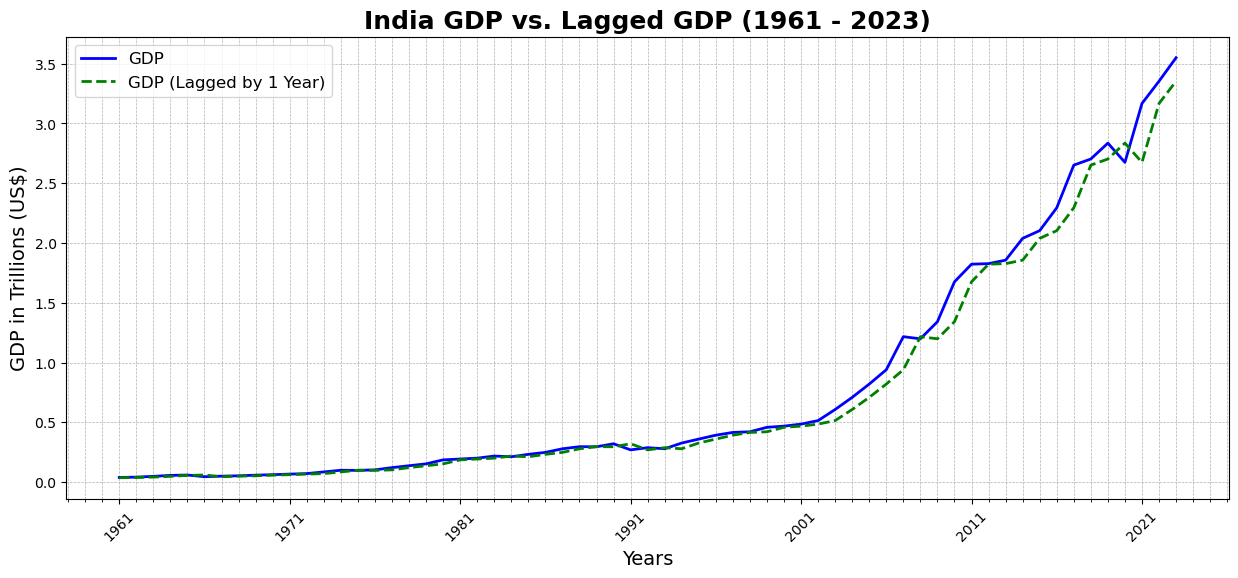

In [7]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot GDP and GDP_L1 with different colors
df['GDP'].plot(ax=ax, color="blue", linewidth=2, label="GDP")
df['GDP_L1'].plot(ax=ax, color="green", linewidth=2, linestyle='--', label="GDP (Lagged by 1 Year)")

# Improve the title and labels
plt.title("India GDP vs. Lagged GDP (1961 - 2023)", fontsize=18, fontweight='bold')
plt.xlabel("Years", fontsize=14)
plt.ylabel("GDP in Trillions (US$)", fontsize=14)

# Format x-axis ticks for better readability (showing every 10 years)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# Format y-axis ticks to show values in trillions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-12:.1f}'))

# Add grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend to differentiate GDP and GDP_L1
plt.legend(loc="upper left", fontsize=12)

# Optional: rotate x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()


**Task 1.6**: Visualize the autocorrelation of GDP by plotting the relationship between India's current GDP and its lagged values.

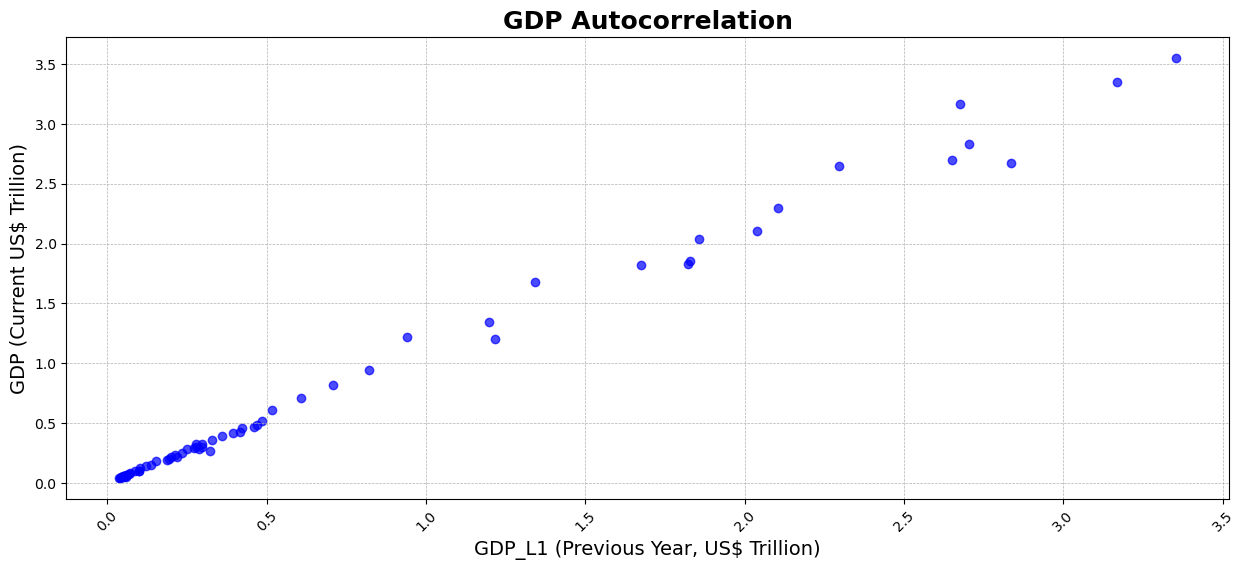

In [8]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Scatter plot with custom color and transparency
plt.scatter(x=df["GDP_L1"], y=df["GDP"], color="b", alpha=0.7)

# Improve the title and labels
plt.title("GDP Autocorrelation", fontsize=18, fontweight='bold')
plt.xlabel("GDP_L1 (Previous Year, US$ Trillion)", fontsize=14)
plt.ylabel("GDP (Current US$ Trillion)", fontsize=14)

# Format x and y axis to show GDP in trillions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-12:.1f}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y*1e-12:.1f}'))

# Add grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Optional: rotate x-axis tick labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Split

**Task 1.7**: Define the target variable and feature set for the model.

The code below establishes the *target vector*, `y`, which represents the GDP values from the DataFrame df, and the *feature matrix*, `X`, consisting of the lagged GDP values (GDP_L1).

In [9]:
target = "GDP"
feature = ["GDP_L1"]

y = df[target]
X = df[feature]

print("Number of Target observations :", len(y))
print("Number of Feature observations :", len(X))

Number of Target observations : 63
Number of Feature observations : 63


**Task 1.8**: Split the dataset into training and testing sets for the linear regression model.

This split is crucial for evaluating the model's performance on unseen data, helping to ensure that the model generalizes well beyond the training dataset.

The code below divides the feature set `X` and the target variable `y` into training and testing subsets.

It calculates a cutoff index based on 80% of the total number of observations. Ensuring that 80% of the data is used for training the model (`X_train_split` and `y_train_split`) while the remaining 20% is reserved for testing (`X_test_split` and `y_test_split`). 

In [10]:
cutoff = int(len(X) * 0.8)
X_train_split, y_train_split = X.iloc[:cutoff], y.iloc[:cutoff]
X_test_split, y_test_split = X.iloc[cutoff:], y.iloc[cutoff:]

# Make sure it is correct. That is, the sum of observations in 'training' and 'test' sets must be 
# equal to total number of observations - either len(X) or len(y).
len(X_train_split) + len(y_test_split) == len(X)

True

**Task 1.9**: Establish a baseline prediction using the mean of the training target variable and calculate the **Mean Absolute Error (MAE)** for this baseline.

The code below computes a baseline prediction by calculating the **mean** of the target variable `y_train_split`, which represents the average GDP value in the training dataset. It then creates a list, `y_pred_baseline`, containing this mean value **repeated for each observation** in `y_train_split`.

The **Mean Absolute Error (MAE)** is then calculated between the actual training values and the baseline predictions, providing a reference point to evaluate how well the model performs.

In [11]:
y_mean = y_train_split.mean()
y_pred_baseline = [y_mean] * len(y_train_split)
mae_baseline = mean_absolute_error(X_train_split, y_pred_baseline)
print("Baseline Mean Absolute Error : ", mae_baseline)

Baseline Mean Absolute Error :  238920524635.1194


**What's the Deal with This Huge Baseline Error?**

- Well, let’s break it down before you start thinking the code's gone rogue! First off, we're talking about **India's GDP**, which means we’re in the realm of **trillions of dollars**. Yeah, you read that right — trillions! So, naturally, any error that compares GDP values will also be colossal.

- Now, here’s the kicker: India happens to be one of the **fastest-growing** economies in the world. If you took a peek at that GDP plot up above, you'd see how fast it's shooting up. This kind of rapid growth means there’s a notable difference in the average GDP over time, which is one of the reasons why the baseline error feels like it’s competing with a skyscraper.

- Plus, let's be honest — we’re leaving out other important factors that influence GDP. While the previous year’s GDP is helpful, it's not the only player in town. Things like global markets, trade policies, inflation, and technology all have their say.

**Big numbers mean big errors** — but that’s normal in this context!

# Build Model

## Iterate

**Task 2.0**: Train a linear regression model using the training dataset.

Okay, things are looking good, let's initialize a linear regression model by creating an instance of `LinearRegression()` and then fits it to the training data `X_train_split` and `y_train_split`. 

In [12]:
model_lr = LinearRegression()
model_lr.fit(X_train_split, y_train_split)

LinearRegression()

**Task 2.1**: Evaluate the performance of the trained linear regression model by calculating the mean absolute error (MAE) for both the training and testing datasets.

The code below computes the mean absolute error for the training set (`training_mae`) and the testing set (`test_mae`).

## Evaluate 

In [13]:
training_mae = mean_absolute_error(y_train_split, model_lr.predict(X_train_split))
test_mae = mean_absolute_error(y_test_split, model_lr.predict(X_test_split))

print("Training Mean Absolute Error :", training_mae)
print("Test Mean Absolute Error :", test_mae)

Training Mean Absolute Error : 25580307365.29858
Test Mean Absolute Error : 223216469052.73163


Looking at the numbers, the **Test MAE is lower than the Baseline MAE**, which is a good sign! This indicates that the model is indeed capturing some meaningful patterns from the data, as it is performing better than just predicting the average GDP (which is what the baseline does).

However, while the model is performing better than the baseline, the difference isn’t **huge**. There could still be room for improvement!

**Why the model struggling with test data?**

That's a nice question. With only 63 total data points, 80% being allocated to training - means the model only trains on around 50 observations. Now, consider that the Indian economy saw rapid growth, around after 2011. Since the training set captures historical data leading up to the rapid growth, it learns from relatively smoother changes. However, when it's tested on the more recent and sudden spikes in GDP, the model struggles to predict these new, extreme values, leading to a higher MAE on the test set.

The model is like a student preparing for an exam but only being given practice questions from the "steady" years. When faced with a final exam filled with complex, rapidly growing GDP numbers from the more recent years, it falters because the training didn’t fully prepare it for these outliers.

This combination of **limited training data and outliers due to rapid economic growth** results in the model underperforming on the test set, raising the test MAE. 

Okay, so if that is the case let's examine how this model performed on different datasets. First lets create a DataFrame containing the actual and predicted GDP values of the test dataset.

**Task 2.2**: Construct a DataFrame containing the actual and predicted GDP values for the testing dataset.

The `y_test` column holds the actual GDP values from the testing set (`y_test_split`), while the `y_pred` column stores the predicted GDP values generated by the linear regression model (`model_lr.predict(X_test_split)`).

In [14]:
df_pred_test = pd.DataFrame(
    {
        "y_test" : y_test_split,
        "y_pred" : model_lr.predict(X_test_split)
    }
)
df_pred_test.head()

,y_test,y_pred
Year,,
2011,1.823052e+12,1.916135e+12
2012,1.827638e+12,2.086063e+12
2013,1.856722e+12,2.091349e+12
2014,2.039126e+12,2.124870e+12
2015,2.103588e+12,2.335102e+12


**Task 2.3**: Visualize the comparison between actual and predicted GDP values in the `df_pred_test` DataFrame.

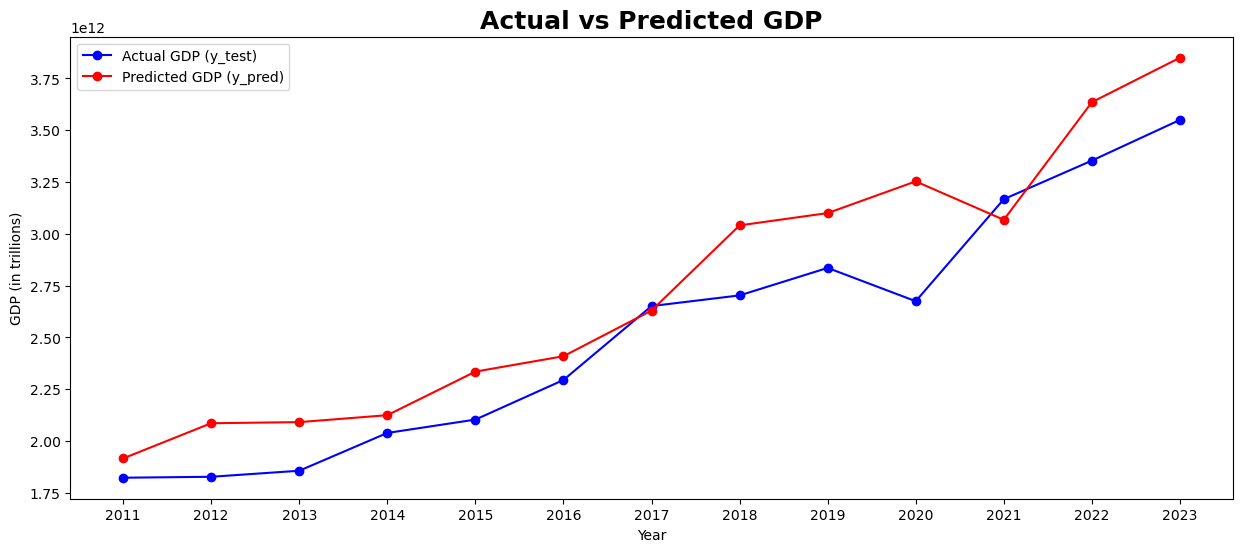

In [15]:
# Plotting y_test and y_pred with proper labels and legend
fig, ax = plt.subplots(figsize=(15,6))

# Plot the actual GDP (y_test)
ax.plot(df_pred_test.index, df_pred_test['y_test'], label='Actual GDP (y_test)', color='blue', marker='o')

# Plot the predicted GDP (y_pred)
ax.plot(df_pred_test.index, df_pred_test['y_pred'], label='Predicted GDP (y_pred)', color='red', marker='o')

# Add titles and labels
ax.set_title('Actual vs Predicted GDP', fontsize=18, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('GDP (in trillions)')
ax.legend();

**Task 2.4**: Visualize the model's predictions on both the test and training data, along with the actual data points.

The code below creates a line plot to display the linear regression model's predictions for both the **test and training datasets**.  

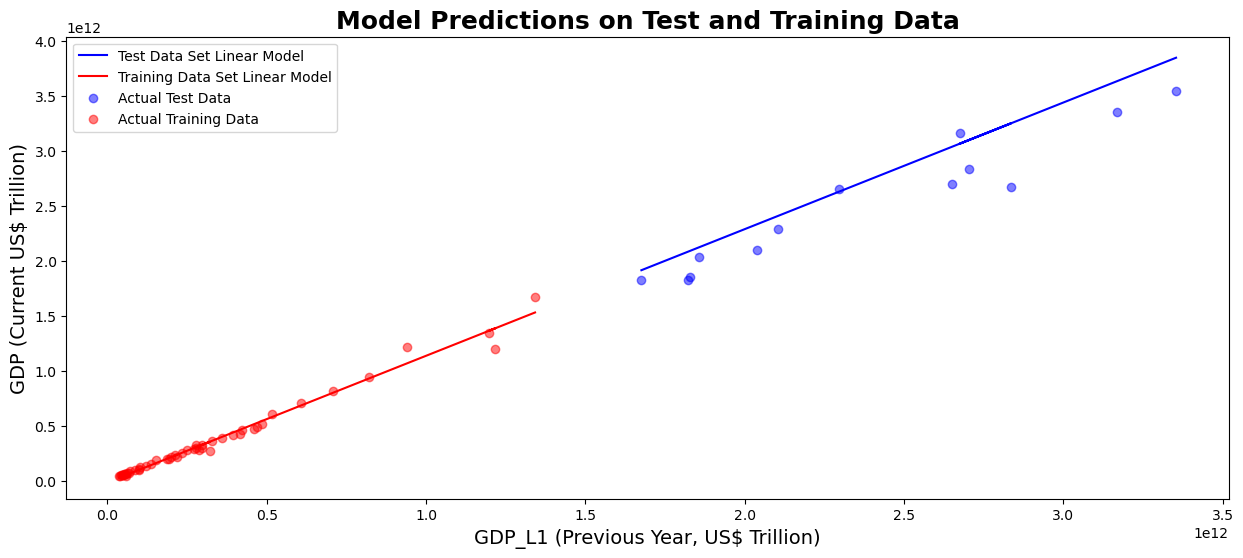

In [16]:
fig,ax = plt.subplots(figsize=(15,6))

# Plot the model's prediction on test and training data
plt.plot(X_test_split, model_lr.predict(X_test_split), color="b", label="Test Data Set Linear Model")
plt.plot(X_train_split, model_lr.predict(X_train_split), color="r", label="Training Data Set Linear Model")

# Add scatter plots for actual test and training data (optional)
plt.scatter(X_test_split, y_test_split, color="b", marker="o", label="Actual Test Data", alpha=0.5)
plt.scatter(X_train_split, y_train_split, color="r", marker="o", label="Actual Training Data", alpha=0.5)

# Add titles and labels
plt.title("Model Predictions on Test and Training Data", fontsize=18, fontweight='bold')
plt.xlabel("GDP_L1 (Previous Year, US$ Trillion)", fontsize=14)
plt.ylabel("GDP (Current US$ Trillion)", fontsize=14)

# Display the legend
plt.legend();

Let’s focus on the plot above. What do we notice? The **red line** represents the model's predictions on the training data, and the **blue line** represents the test set. The scatter plots show the actual values for both training (red) and test (blue) data.

On the training set, our model fits closely to the actual values, hugging the red points tightly. This explains the lower **training** MAE. But notice how things change when we look at the blue test set. The model struggles to generalize on these points, especially after the economy skyrockets past **3 trillion dollars**.

# Time to Build the Ultimate Model!

Now that we’ve thoroughly examined how the model performs on both training and test data. This demonstration was designed to help you learn how to conduct a train-test split in time series data, and more importantly, how to meaningfully analyze a model’s performance in both phases.

Here, we're moving on to build the ultimate model. This time, there will be **no test data** because we’re training the model on **all available data**. We’ve already established that our model performs well on both the training and test sets, and we’re confident it can **perform even better** if we provide it with **more data** to learn from.

## Iterate

**Task 2.5**: Train a Linear Regression Model on the Entire Dataset.

In [17]:
X_train = X
y_train = y

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate

**Task 2.6**: Calculate Baseline Mean Absolute Error.

In [18]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(X_train, y_pred_baseline)
print("Baseline Mean Absolute Error : ", mae_baseline)

Baseline Mean Absolute Error :  759829570110.8856


**Task 2.7**: Calculate Training Mean Absolute Error.

In [19]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))

print("Training Mean Absolute Error :", training_mae)

Training Mean Absolute Error : 45748318685.62349


Training Mean Absolute Error : 45748318685.62349

The baseline mean absolute error (MAE) of the `model` is 759,829,570,110.89, while the training MAE of the `model` is significantly lower at 45,748,318,685.62. Which means this `model` learned the relationship between GDP and its lagged values quite well. 

**But, ever wonder why this `model` has a higher training MAE than our previous model (`model_lr`)?**

When we trained the `model_lr earlier`, it was using only 80% of the data—fewer observations, but potentially cleaner in terms of fitting the model well. However, in our ultimate model (`model`), we threw all the data into the training pot. And guess what? With more data (especially the ones post-2011 where the GDP skyrocketed), the complexity increased, leading to more room for error! So, don’t worry, it’s all about data size, complexity, and the differences in the training sets used.

Lets see how this model fits to the data. 

**Task 2.8**: : Visualize this model's predictions on training data, along with the actual data points.

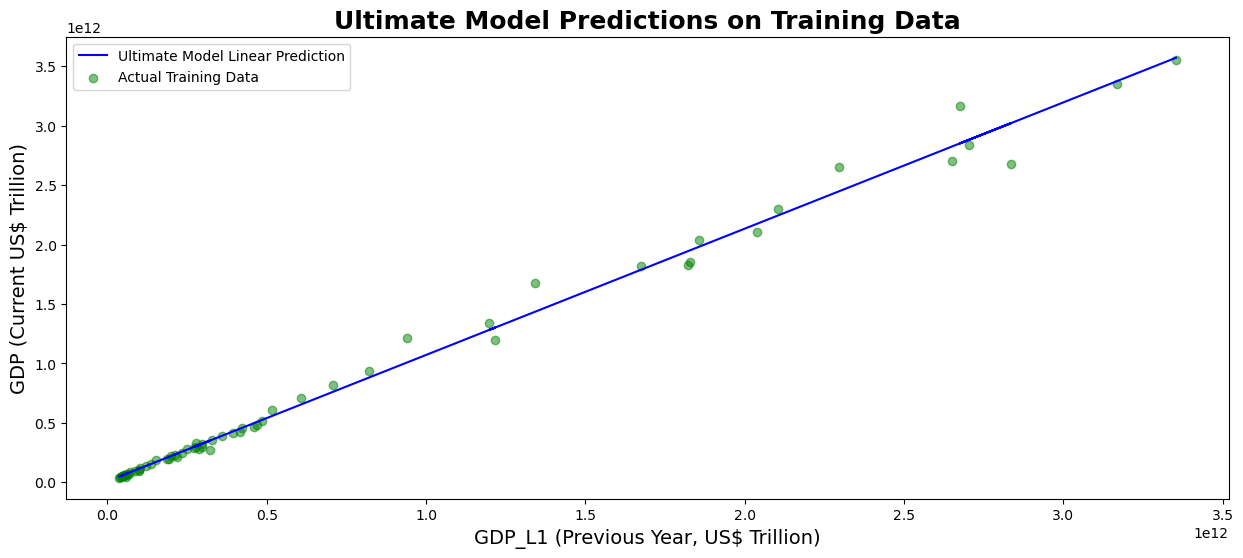

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the ultimate model's prediction on training data
plt.plot(X_train, model.predict(X_train), color="b", label="Ultimate Model Linear Prediction")

# Add scatter plots for actual training data
plt.scatter(X_train, y_train, marker="o", color="g", label="Actual Training Data", alpha=0.5)

# Add titles and labels
plt.title("Ultimate Model Predictions on Training Data", fontsize=18, fontweight='bold')
plt.xlabel("GDP_L1 (Previous Year, US$ Trillion)", fontsize=14)
plt.ylabel("GDP (Current US$ Trillion)", fontsize=14)

# Display the legend
plt.legend()
plt.show()


Take a close look at both plots – the **Model Predictions on Test and Training Data** from `model_lr` and the **Ultimate Model Predictions on Training Data** from our ultimate model - `model`. Notice something awesome? Yes, the ultimate model hugs the training data points even tighter! 

What it means is that our `model` has more data to learn from, it's been able to optimize its fit to the training data. The result? An even better match to the actual GDP values.

This is the moment when your model says, "Look, I’ve mastered the training data!"

Now that we've improved our model by training it on all available data, we can **expect better predictions** on average. Why? Because the model has seen more data, it has learned more patterns, and it's gotten smarter about the trends in India's GDP over time. It's like giving your model an upgrade – and now it’s ready to predict with **more confidence**! 

# Make Prediction Function

**Task 2.9**: Create a function that predicts the GDP for the next year based on a given year's GDP value.

In [21]:
def make_prediction(gdp):
    """
    Predict the GDP for the next year based on a given year's GDP.

    Parameters:
    gdp : float
        The GDP value of an year.

    Returns:
    float
        The predicted GDP for the next year.
    """
    # Prepare the data for the next year's prediction
    X = np.array([[gdp]])
    
    # Make the prediction for the next year
    predicted_gdp = model.predict(X)
    
    # Print the predicted GDP
    response = print(f"Predicted GDP for the next year: {predicted_gdp[0]:,.2f}")
    
    # Return the predicted GDP value
    return response

**Task 3.0**:  Use the `make_prediction` function to predict the GDP for the year 2024 based on the GDP value for the year 2023.

In [22]:
gdp_2023 = 3_353_470_000_000  # GDP value for 2023

make_prediction(gdp_2023)

Predicted GDP for the next year: 3,570,840,037,190.95


/Users/anoop/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The model predicts that India's GDP for the year 2024 will be approximately **$3,570,840,037,190.95**. Amazing, a **3.5 trillion-dollar economy** in 2024, our model is performing better! 

# Save Model

**Task 3.1**: Save the trained machine learning model to a pickle file.

This ensures that the model can be easily saved and reused for future predictions without having to retrain it.

In [23]:
import joblib

# Save the model as a pickle file
joblib.dump(model, "india_gdp_forecasting_model.pkl")

['india_gdp_forecasting_model.pkl']

***

*This work is licensed under the [Apache License 2.0](https://github.com/neuraledgeai/India_GDP_Forecasting_Project/blob/main/LICENSE)*